
Date: 15/05/2019

Environment: Python 3.7.0 and Anaconda3 5.2.0(64-bit)


## Libraries used:

* re 2.2.1 (for regular expression, included in Anaconda Python 3.7.0)
* json 2.0.9 (for json file handling, included in  Anaconda Python 3.7.0)
* datetime(for date time operations, included in Anaconda Python 3.7.0)
* math(to perform mathematical calculation, included in Anaconda Python 3.7.0)
* pandas (for manipulating dataframes, included in Anaconda Python 3.7.0)
* matplotlib(for graphing dataframes, included in Anaconda Python 3.7.0)
* numpy(for numeric computations, included in Anaconda Python 3.7.0)
* seaborn(for graphs, included in Anaconda Python 3.7.0)
* LinearRegression (for regression analysis, included in Anaconda Python 3.7.0)

Some images are captured from Tableau

********************************************************************************************************************************

## Content 

### 1.	Introduction 


### 2.	Libraries


### 3.	Exploring dirty data


### 4.	Data cleaning

    4.1	Fixing the error in Uber Type
    
    4.2	Correcting error in departure date
    
    4.3	Fixing the latitude and longitude
    
    4.4	Fixing error in region
    
    4.5	Fixing Departure time and arrival time
    
    4.6	Fixing distance and travel time
    
    4.7	Saving the fixed file
    
    
### 5.	Treatment of missing data

    5.1	Imputing Uber type
    
    5.2	Data Preparation for modelling travel fare 
    
    5.3	Modelling the prepared Uber data to impute fare for each type of Uber
    
        5.3.1	Modelling for Uber Pool
        
        5.3.2	Modelling for Uber X
        
        5.3.3	Modelling for Uber Black
        
    5.4	Saving the fixed file
    
    
### 6.	Outlier detection and removal

    6.1	Methodology based on IQR
    
    6.2	Outlier removal
    
    6.3	Saving the fixed file
    
    
### 7.	Summary 


### 8.	References



********************************************************************************************************************************


## 1. Introduction

The data is from Uber and contains information regarding trips in and around Melbourne. It contains information like Trip_ID, origination, destination, distance, time, fare etc. We will cover the codeing information for all the three tasks in this file


## 2.  Import libraries 

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np
import datetime
import re
from matplotlib import pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
import math 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [1038]:
#reading the dirty data, nodes and edges file and storing it in a dataframe

data= pd.read_csv("29915651_dirty_data.csv")
nodes=pd.read_csv("nodes.csv")
edges=pd.read_csv("edges.csv")


In [1039]:
#print shape of data
data.shape

(298, 14)

In [1040]:
edges.shape

(42224, 6)

In [1041]:
nodes.shape

(17117, 3)

## 3.  Exploring dirty data


### Task 1

#### Detect and fix errors in <student_no>_dirty_data.csv.

The data set is analysed to understand what are the columns. This is done to understand:
the spread of the various columns

presence of null values

the level of the data

the factors of categorial variable etc


In [1042]:
data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38
1,ID3331420694,1,1,4,-37.808916,144.966157,-37.808679,145.006707,3842.1,2018-05-23,11:12:16,903.36,11:27:19,8.67
2,ID1609759320,0,2,1,-37.818954,144.943264,-37.802045,144.966781,3382.1,2018-07-04,08:23:32,907.56,8:38:39,5.16
3,ID1587559514,0,8,2,-37.815834,145.046450,-37.813678,144.939437,9775.3,2018-02-19,20:19:07,2738.16,21:04:45,11.21
4,ID1887103666,0,3,1,-37.821801,145.002530,-37.818042,144.952916,6182.0,2018-03-17,09:02:26,1548.90,9:28:14,9.62


In [1043]:
data.info()
#no nulls identified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 14 columns):
Unnamed: 0               298 non-null object
Uber Type                298 non-null int64
Origin Region            298 non-null int64
Destination Region       298 non-null int64
Origin Latitude          298 non-null float64
Origin Longitude         298 non-null float64
Destination Latitude     298 non-null float64
Destination Longitude    298 non-null float64
Journey Distance(m)      298 non-null float64
Departure Date           298 non-null object
Departure Time           298 non-null object
Travel Time(s)           298 non-null float64
Arrival Time             298 non-null object
Fare$                    298 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 32.7+ KB


In [1044]:
data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.781879,5.050336,4.862416,-36.577921,144.932994,-36.578255,144.934346,16004.578188,4166.095772,79.790973
std,0.762819,2.655434,2.532854,9.741679,0.109186,9.733807,0.103099,16550.771171,3979.509035,191.564337
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,934.000000,330.600000,3.820000
25%,0.000000,3.000000,3.000000,-37.823157,144.929853,-37.824686,144.927170,5490.000000,1414.275000,13.805000
50%,1.000000,5.000000,5.000000,-37.815263,144.957335,-37.815315,144.959989,8742.500000,2583.210000,18.805000
75%,1.000000,7.750000,7.000000,-37.805997,144.985865,-37.806350,144.990572,13169.000000,4022.370000,44.062500
max,3.000000,9.000000,9.000000,38.110916,145.046450,37.815834,145.046450,51061.000000,13204.980000,1098.650000


In [1045]:
#renaming data columns
data.columns=['trip_id', 'type', 'ori_region', 'dest_region','ori_lat', 'ori_lng',
              'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare']


In [1046]:
data.describe(include=['O'])
#trip ID is unique

,trip_id,dept_date,dept_time,arrival_time
count,298,298,298,298
unique,298,154,297,298
top,ID1751595959,2018-07-28,06:48:36,12:44:39
freq,1,6,2,1


The trip ID column is found to be the unique identifier

## 4. Data Cleaning 

In [1047]:
#copy of main dataframe
data_cp=data.copy()
#data = data_cp

Uber type column seems to be fine, with no repeats, hence no cleaning required for this column

In [1048]:
data.type.unique()

array([1, 0, 2, 3], dtype=int64)

In [1049]:
qc_data= pd.read_csv("29915651_dirty_data.csv")
qc_data[qc_data['Uber Type'] == 3]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
127,ID1694360495,3,7,4,-37.861835,144.905716,-37.813234,145.000175,11021.0,2018-04-04,01:43:40,3498.12,2:41:58,17.13
128,ID3652916570,3,2,5,-37.821383,144.946364,-37.811726,144.929737,3179.0,2018-05-06,12:37:05,739.02,12:49:24,15.16
137,ID3184273708,3,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-02-15,08:41:18,12681.06,12:12:39,48.10
142,ID1769280272,3,1,8,-37.825114,144.956168,-37.815834,145.046450,9748.0,2018-03-03,01:50:33,2821.86,2:37:34,21.29


### 4.1 Fixing the error in Uber Type

There seems to be an error in this column, as description mentions that there is only there types of Uber journeys, namely Uber
pool, Uberx, and Uber black.
On verifying the data, it can be seen that the column type and the trip id are related based on the first digit in the trip id column
All id's starting with 1 are associated to uber type 0
All id's starting with 3 are associated to uber type 1
All id's starting with 5 are associated to uber type 2
Based on this we can reassign the uber type wrongly assigned as 3


In [1050]:
# 3.1 Correcting error in uber type

row_cnt = len(data) 

for i in range(row_cnt):
    pattern=data.trip_id.iloc[i,][0:3]
    if pattern =='ID1':
        data.type.iloc[i,]="0"
    elif pattern =='ID3':
        data.type.iloc[i,]="1"
    elif pattern =='ID5':
        data.type.iloc[i,]="2"
    else:
        data.type.iloc[i,]="error"
   

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [1051]:
data.type.unique()


array([1, 0, 2], dtype=int64)

In [1052]:
data[data['type'] == 3]

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare


In [1053]:
print(data.groupby(data.type).trip_id.nunique())


type
0    126
1    124
2     48
Name: trip_id, dtype: int64


In [1054]:
print(data_cp.groupby(data_cp.type).trip_id.nunique())


type
0    122
1    123
2     49
3      4
Name: trip_id, dtype: int64


There are also three cases ID3411516233, ID1294958888, and ID1820866951 which are wrongly tagged 
From the above data cleaning step, that also has been rectified 
The error is shown below along with the rectified data

In [1055]:
data_cp[data_cp['trip_id']=='ID1294958888']

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
143,ID1294958888,1,9,3,-38.110916,144.654173,-37.81931,145.001698,46984.0,2018-05-28,06:48:36,11431.56,9:59:07,22.65


In [1056]:
data[data['trip_id']=='ID1294958888']

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
143,ID1294958888,0,9,3,-38.110916,144.654173,-37.81931,145.001698,46984.0,2018-05-28,06:48:36,11431.56,9:59:07,22.65


In [1057]:
data1 = data.copy()

### 4.2 Correcting error in departure date

From the EDA it is understood that few rows in the departure date are errorneous.
The errors are of three types
1. swap in year-month-day format
2. faulty dates in feb, ending with 30 etc
3. faulty dates ending with 31 in months having 30 days

In [1058]:


#correcting swapped dates

def clean_date(date):
    incorrect = [r'(\d{4})-(1[0-9]|2[0-9]|3[0-1])-(0?[1-9]|1[0,2])$', #year-day-month
               r'(\d{4})-(0?[4,6,9]|11)-(31)$', #faulty 31 ending month dates 
               r'(\d{4})-(02)-(3[0,1])$', #faulty feb dates
               r'(\d{4})-(0?[1-9]|1[0-2])-(0?[1-9]|1[0-9]|2[0-9]|3[0-1])$']  #year-month-day
        
    #incorrect = [re.compile(p) for p in incorrect]
    
    for index, err in enumerate(re.compile(p) for p in incorrect):
        part = err.match(date)
        if part and index == 0: 
             return f'{part[1]}-{part[3]}-{part[2]}' #change to day/month/year
            
        if part and index == 1: 
             return f'{part[1]}-{part[2]}-30' #correct to ending 30 
            
        if part and index == 2: 
             return f'{part[1]}-{part[2]}-28' #change to ending 28 for feb
              
        if part and index == 3:  
             return f'{part[1]}-{part[2]}-{part[3]}' #keep it same
        

In [1059]:

data['new_dept_date'] = 0

for i in range(row_cnt):
    err_date=data.dept_date.iloc[i,]
    #print(err_date)
    data.new_dept_date.iloc[i,] = clean_date(err_date)
    #print(data.new_dept_date)
     

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1060]:
data[data['trip_id'] == 'ID5210061440']

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,new_dept_date
186,ID5210061440,2,8,2,-37.807202,145.026637,-37.814984,144.936438,9980.0,2018-14-05,19:20:01,2554.14,20:02:35,228.66,2018-05-14


In [1061]:
data2 = data.copy()

In [1062]:
data.dept_date = data.new_dept_date

In [1063]:
data = data.drop(columns=['new_dept_date'])

In [1064]:
#check
data[data['trip_id'] == 'ID3888859966']

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
175,ID3888859966,1,9,6,-38.110916,144.654173,-37.773803,144.983647,51061.0,2018-04-28,18:18:01,12952.44,21:53:53,57.41


### 4.3 Fixing latitude and longitude

The latitude and longitude were plotted in Tableau and few errorneous data points were identified
The co-ordinates for Origin and Destination point are shown below. We know that data given is for Victoria but we can see that some points are in sea near Japan, indicating error in lattitue values of these points. 


![alt text](Ori_cord_problem.png "Title")


Similarly we can see problem with the destination co-ordinates as well

![alt text](Dest_cord_problem.png "Title")

The following code snippet helps to clean these errorneous data points

In [1065]:
for i in range(row_cnt):
    
    # Origin lat, long is fixed 
    if data.ori_lat.iloc[i,] > 0:
        data.ori_lat.iloc[i,] = -1*(data.ori_lat.iloc[i,])

    #if data.ori_lng.iloc[i,] < 0:
     #   data.ori_lng.iloc[i,] = -1*(data.ori_lng.iloc[i,])

    # Destination lat, long is fixed

    if data.dest_lat.iloc[i,] > 0:
        data.dest_lat.iloc[i,] = -1*(data.dest_lat.iloc[i,])

    #if data.dest_long.iloc[i,] < 0:
     #   data.dest_long.iloc[i,] = -1*(data.dest_long.iloc[i,])

    

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [1066]:
data3 = data.copy()
data.to_csv('test_3.csv', encoding='utf-8', index=False)

The corrected data points can be seen in the images below

#### Origin co-ordinates

![alt text](Ori_cord_corrected.png "Title")

#### Destination Co-ordinates

![alt text](Dest_cord_corrected.png "Title")


### 4.4 Fixing error in region 

On plotting the latitude longitude value corresponding to region for origin and destination, few outliers are observed. These indicate the presence of wrongly marked regions

In [1069]:
#EDA Plots

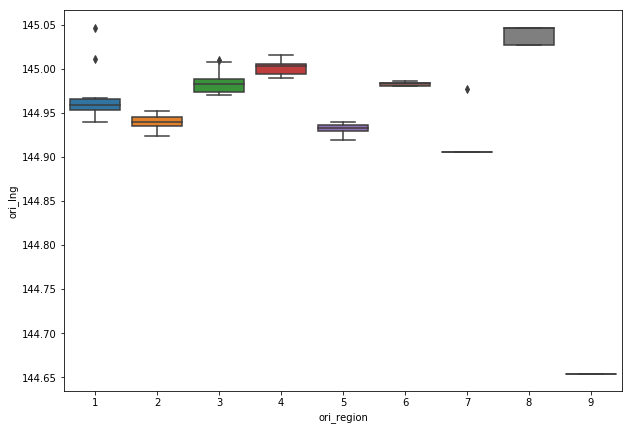

In [1070]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']=10,7
ori_filt=data[['ori_lat','ori_lng','ori_region']]
sns.boxplot(data=ori_filt,x='ori_region',y='ori_lng')

From the above plot, outliers can be seen in region 1, which probably should have belonged to region 9

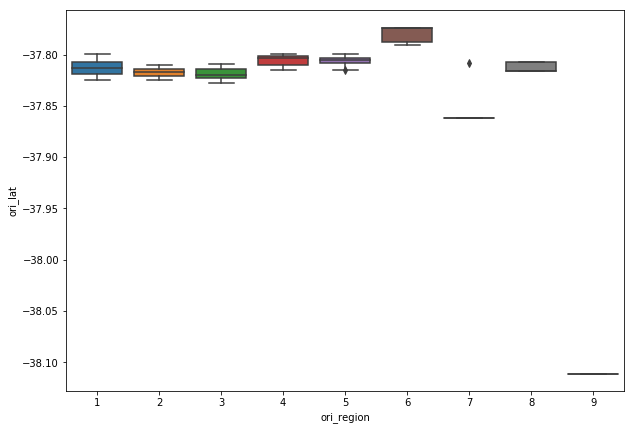

In [1071]:
sns.boxplot(data=ori_filt,x='ori_region',y='ori_lat')

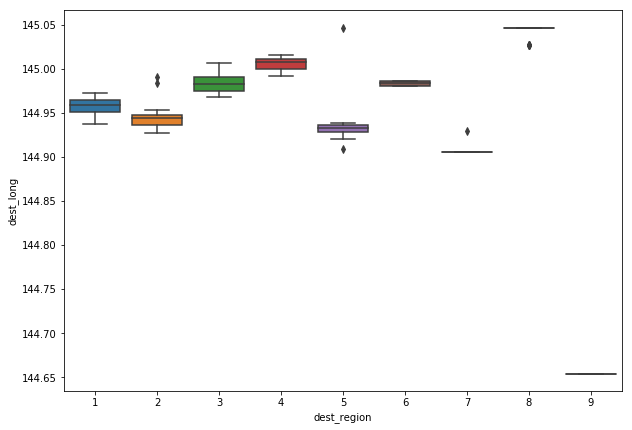

In [1072]:
plt.rcParams['figure.figsize']=10,7
dest_filt=data[['dest_lat','dest_long','dest_region']]
sns.boxplot(data=dest_filt,x='dest_region',y='dest_long')


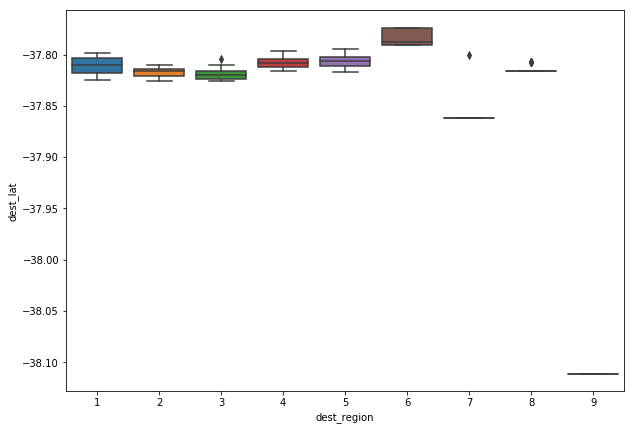

In [1073]:
sns.boxplot(data=dest_filt,x='dest_region',y='dest_lat')


### Methodology
The errors are fixed by combining the non missing value and th outlier data, as we know they dont have error in region attribute

Steps
1. Combine all the datasets
2. Find the median latitude and longitude for all the region, by combining the destination region and origin region datapoints
3. Compute the distance for all datapoints from the median
4. Select the region with minimum distance to median of regions as the correct region


In [1075]:
data.shape

(298, 14)

In [1076]:
#collating all regions for destination and origin to find the median geographical co-ordinate

missing_value= pd.read_csv("29915651_missing_value.csv")
missing_value.shape

(124, 14)

In [1077]:
outliers= pd.read_csv("29915651_outliers.csv")
outliers.shape

(108, 15)

In [1078]:
missing_value.columns=['trip_id', 'type', 'ori_region', 'dest_region','ori_lat', 'ori_lng',
              'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare']

In [1079]:
outliers = outliers.drop(columns=['Unnamed: 0'])

In [1080]:
outliers.columns

Index(['Unnamed: 0.1', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [1081]:
outliers.columns=['trip_id', 'type', 'ori_region', 'dest_region','ori_lat', 'ori_lng',
              'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare']

In [1082]:
data_all = data.copy()
data_all.shape

(298, 14)

In [1083]:
#data_all = data_all.append(missing_value) 
#data_all = data_all.append(outliers)
#concatnating all data
data_all1 = pd.concat([data_all,missing_value,outliers])

In [1084]:
data_all1.shape

(530, 14)

The combined dataset has 530 entries

In [1085]:
origin_data=data[['ori_region','ori_lat','ori_lng']]
origin_data.rename(columns={'ori_region': 'reg', 'ori_lat': 'lat', 'ori_lng':'lng'}, inplace=True)
dest_data=data[['dest_region','dest_lat','dest_long']]
dest_data.rename(columns={'dest_region': 'reg', 'dest_lat': 'lat', 'dest_long':'lng'}, inplace=True)
reg_data = pd.concat([origin_data,dest_data])

#Calculating the median value - taken as the center of each cluster
#region=reg_data.groupby('reg')[['lat','lng']].median()

#region

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [1086]:
region_med=reg_data.groupby('reg').median()
region_med = region_med.reset_index()
region_med


,reg,lat,lng
0,1,-37.811795,144.958893
1,2,-37.816556,144.941059
2,3,-37.819776,144.982691
3,4,-37.808537,145.004085
4,5,-37.805824,144.932855
5,6,-37.787433,144.983647
6,7,-37.861835,144.905716
7,8,-37.815834,145.046450
8,9,-38.110916,144.654173


The co-ordinates in the above table is considered as the center point for each region. 

If distance of a point is calculated to each region co-ordinate, then the region to which it has the minimum distance will be considered that points region.



#### The distance is calculated based on Haversine distance, which is useful in computing distance between points on Earth if co-ordination information is known.

In [1087]:
from math import sin, cos, sqrt, atan2, radians

In [1088]:
#Calculate the Haversine distance.
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

def distance(lat1,lon1,lat2,lon2):
   
    radius = 6378.0  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

#### To use this function for each datapoint, firsty the data and region median data is cross joined

In [1089]:
#https://stackoverflow.com/questions/53699012/performant-cartesian-product-cross-join-with-pandas/53699013#53699013
import itertools
l=list(itertools.product(data_all.values.tolist(),region_med.values.tolist()))
cross_data = pd.DataFrame(list(map(lambda x : sum(x,[]),l)))

In [1090]:
cross_data.columns=['trip_id', 'type', 'ori_region', 'dest_region','ori_lat', 'ori_lng',
              'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare','med_id','reg_med_lat', 'reg_med_lng']

In [1091]:
cross_data['diff_origin'] = 0
cross_data['diff_dest'] = 0

In [1092]:
cross_data['diff_origin'] = cross_data.apply(lambda x: distance(x['ori_lat'],x['ori_lng'],x['reg_med_lat'],x['reg_med_lng']),axis=1)
cross_data['diff_dest'] = cross_data.apply(lambda x: distance(x['dest_lat'],x['dest_long'],x['reg_med_lat'],x['reg_med_lng']),axis=1)


In [1093]:
cross_data.head()

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,med_id,reg_med_lat,reg_med_lng,diff_origin,diff_dest
0,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38,1.0,-37.811795,144.958893,2.564395,2.893230
1,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38,2.0,-37.816556,144.941059,3.773599,1.475230
2,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38,3.0,-37.819776,144.982691,0.614594,5.085116
3,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38,4.0,-37.808537,145.004085,2.660027,6.869203
4,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38,5.0,-37.805824,144.932855,4.875965,0.807821


In [1094]:
ori_data = cross_data[['trip_id','ori_region','ori_lat', 'ori_lng','med_id','diff_origin']]
dest_data = cross_data[['trip_id','dest_region','dest_lat', 'dest_long','med_id','diff_dest']]

In [1095]:
dest_data.head()

,trip_id,dest_region,dest_lat,dest_long,med_id,diff_dest
0,ID3320317494,5,-37.810676,144.926025,1.0,2.893230
1,ID3320317494,5,-37.810676,144.926025,2.0,1.475230
2,ID3320317494,5,-37.810676,144.926025,3.0,5.085116
3,ID3320317494,5,-37.810676,144.926025,4.0,6.869203
4,ID3320317494,5,-37.810676,144.926025,5.0,0.807821


After obtaining distance for each data point to each region, the min distance is obtained by aggregating using min function

In [1096]:
#https://stackoverflow.com/questions/27488080/python-pandas-filter-rows-after-groupby

groups = ori_data.groupby(by=['trip_id'])
correct_reg_origin = pd.DataFrame(groups.apply(lambda g: g[g['diff_origin'] == g['diff_origin'].min()]))
cols = [0]
correct_reg_origin.drop(correct_reg_origin.columns[cols],axis=1,inplace=True)
correct_reg_origin=correct_reg_origin.reset_index()
correct_reg_origin.head()

,trip_id,level_1,ori_region,ori_lat,ori_lng,med_id,diff_origin
0,ID1114439128,881,9,-38.110916,144.654173,9.0,0.000000
1,ID1127511506,1987,8,-37.815834,145.046450,8.0,0.000000
2,ID1138474503,935,9,-38.110916,144.654173,9.0,0.000000
3,ID1139090290,2557,1,-37.809735,144.943283,2.0,0.784012
4,ID1140358725,2185,8,-37.815834,145.046450,8.0,0.000000


In [1097]:

groups = dest_data.groupby(by=['trip_id'])
correct_reg_dest = pd.DataFrame(groups.apply(lambda g: g[g['diff_dest'] == g['diff_dest'].min()]))
cols = [0]
correct_reg_dest.drop(correct_reg_dest.columns[cols],axis=1,inplace=True)
correct_reg_dest=correct_reg_dest.reset_index()
correct_reg_dest.head()

,trip_id,level_1,dest_region,dest_lat,dest_long,med_id,diff_dest
0,ID1114439128,878,6,-37.773845,144.983689,6.0,1.512526
1,ID1127511506,1984,5,-37.806224,144.932369,5.0,0.061717
2,ID1138474503,928,1,-37.808434,144.945432,2.0,0.982534
3,ID1139090290,2561,6,-37.773845,144.983689,6.0,1.512526
4,ID1140358725,2181,4,-37.811679,145.007290,4.0,0.449232


In [1099]:
#changing the origin region
data_x = data.set_index('trip_id').join(correct_reg_origin.set_index('trip_id'), how='inner', rsuffix='ori')
data_x['ori_region'] = data_x['med_id']
#cols=[13,14,15,16,17,18]
data_x.drop(data_x.columns[[13,14,15,16,17,18]],axis=1,inplace=True)
data_x = data_x.reset_index()
data_x.head()

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
0,ID3320317494,1,3.0,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38
1,ID3331420694,1,1.0,4,-37.808916,144.966157,-37.808679,145.006707,3842.1,2018-05-23,11:12:16,903.36,11:27:19,8.67
2,ID1609759320,0,2.0,1,-37.818954,144.943264,-37.802045,144.966781,3382.1,2018-07-04,08:23:32,907.56,8:38:39,5.16
3,ID1587559514,0,8.0,2,-37.815834,145.046450,-37.813678,144.939437,9775.3,2018-02-19,20:19:07,2738.16,21:04:45,11.21
4,ID1887103666,0,4.0,1,-37.821801,145.002530,-37.818042,144.952916,6182.0,2018-03-17,09:02:26,1548.90,9:28:14,9.62


In [1106]:
#changing the destination region
#staring with data_x, in which origin regions have already been changed
data_y = data_x.set_index('trip_id').join(correct_reg_dest.set_index('trip_id'), how='inner', rsuffix='dest')
data_y['dest_region'] = data_y['med_id']
#cols=[13,14,15,16,17,18]
data_y.drop(data_y.columns[[13,14,15,16,17,18]],axis=1,inplace=True)
data_y = data_y.reset_index()
data_y.head()

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
0,ID3320317494,1,3.0,5.0,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38
1,ID3331420694,1,1.0,4.0,-37.808916,144.966157,-37.808679,145.006707,3842.1,2018-05-23,11:12:16,903.36,11:27:19,8.67
2,ID1609759320,0,2.0,1.0,-37.818954,144.943264,-37.802045,144.966781,3382.1,2018-07-04,08:23:32,907.56,8:38:39,5.16
3,ID1587559514,0,8.0,2.0,-37.815834,145.046450,-37.813678,144.939437,9775.3,2018-02-19,20:19:07,2738.16,21:04:45,11.21
4,ID1887103666,0,4.0,1.0,-37.821801,145.002530,-37.818042,144.952916,6182.0,2018-03-17,09:02:26,1548.90,9:28:14,9.62


#### As seen in the below plots the outliers have significantly reduced for eachregion

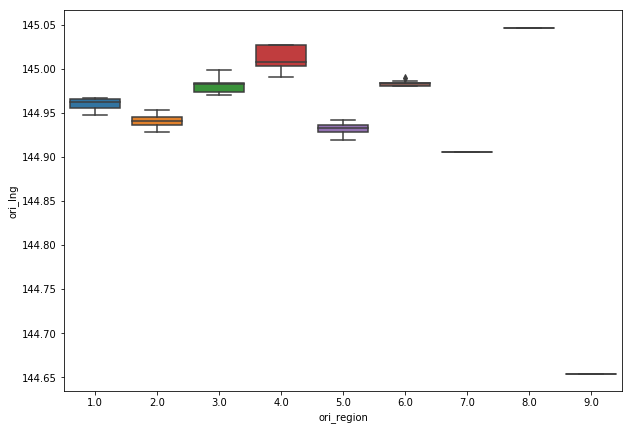

In [1107]:
#verifying if origin longitudes are in correct region
plt.rcParams['figure.figsize']=10,7
ori_filt=data_y[['ori_lat','ori_lng','ori_region']]
sns.boxplot(data=ori_filt,x='ori_region',y='ori_lng')


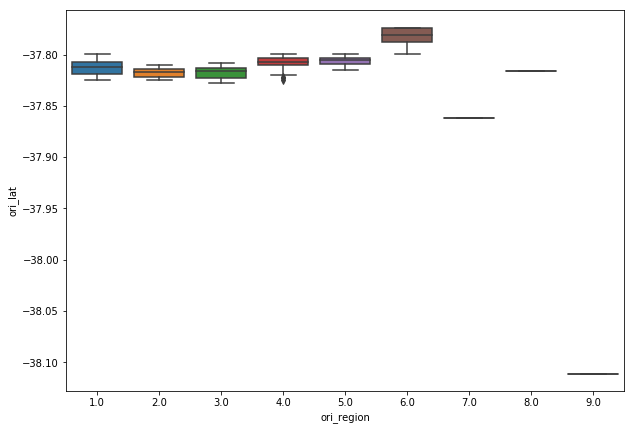

In [1108]:
#verifying is origin latitudes are in correct region
sns.boxplot(data=ori_filt,x='ori_region',y='ori_lat')


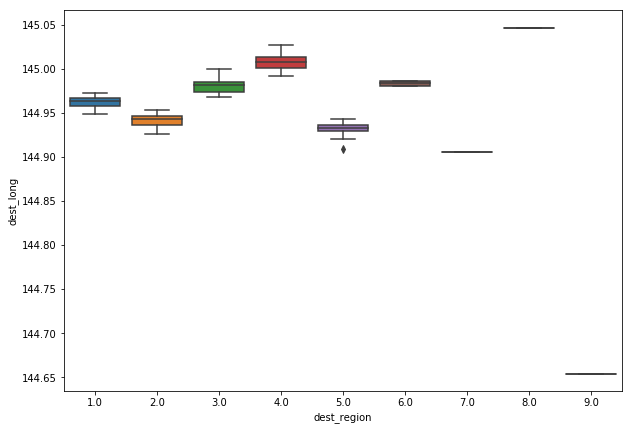

In [1109]:
#verifying if dest longitudes are in correct region
plt.rcParams['figure.figsize']=10,7
dest_filt=data_y[['dest_lat','dest_long','dest_region']]
sns.boxplot(data=dest_filt,x='dest_region',y='dest_long')

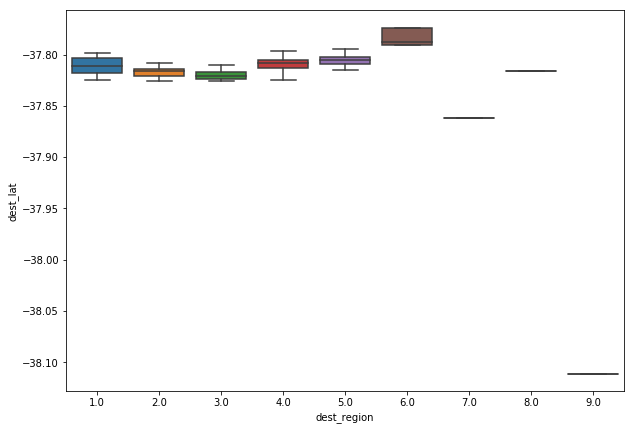

In [1110]:
#verifying is destination latitudes are in correct region
sns.boxplot(data=dest_filt,x='dest_region',y='dest_lat')

In [1124]:
data_next=data_y.copy()

Few datapoints were manually changed, this was done in the end to follow by the information that one row has only one error

In [1125]:
#reassigning this data point to original cause it has already been changed for origin latitude
data_next['ori_region'][data_next.trip_id == 'ID1639783748'] = "2.0"

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1132]:
#reassigning this data point to original cause it has already been changed for departure time 
data_next['ori_region'][data_next.trip_id == 'ID5210061440'] = "8.0"

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1164]:
#reassigning this data point to original cause it has the depature time arrival time swap error 
data_next['ori_region'][data_next.trip_id == 'ID3220141693'] = "4.0"

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1183]:
#ID1979536679
##reassigning this data point to original cause it has the distance error 
data_next['ori_region'][data_next.trip_id == 'ID1979536679'] = "8.0"

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1146]:
#reassigning this data point to original cause it has already been changed for uber type 
data_next['dest_region'][data_next.trip_id == 'ID1294958888'] = "3.0"

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_next['dest_region'][data_next.trip_id == 'ID5905696098'] = "8.0"

In [1185]:
data_next[data_next.trip_id == 'ID1979536679'] 

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,origin_node,dest_node,new_dist,new_tt
5,ID1979536679,0,8.0,2,-37.807202,145.026637,-37.8139,144.944226,8049.0,2018-07-18,03:20:07,2090.76,3:54:57,15.97,304700558,506050894,8049.0,2090.76


These two points have been changed for origin, but not sure if destination should also be changed
ID5905696098
ID1906398306

### 4.5 Fixing Departure time and arrival time

Firsty the format of data is checked, to flag any inconsistency

In [1152]:
#https://stackoverflow.com/questions/27488080/python-pandas-filter-rows-after-groupby

def checktime(time):
    correct_format = "%H:%M:%S"
    isvalidtime= True
    try:
        datetime.datetime.strptime(time, correct_format)
    except:
        isvalidtime = False

    if(isvalidtime):
        return 1
    else:
        return 0


In [1153]:
check_dept_time = pd.DataFrame(columns=['check'])
check_dept_time['check'] = data_next.apply(lambda x: checktime(x['dept_time']),axis=1)
check_dept_time.check.sum()

298

In [1154]:
check_arr_time = pd.DataFrame(columns=['check'])
check_arr_time['check'] = data_next.apply(lambda x: checktime(x['arrival_time']),axis=1)
check_arr_time.check.sum()

298

All the time data points are in correct format 

### Checking swap between arrival time  and departure time

The difference between the arrival time and the departure time is checked and in cases where the difference is greater than 10 hours the arival time and departure time are swapped.
This is done using the pd.to_timedelta function. This function helps to calculate the differnce in time, taking into account the days over which the time points are spread.


### Methodology

1. Calculate the time differnce between arrival time and departure time
2. Convert the difference from timedelta format to seconds (as that be done easily)
3. Convert the differnce to hours 
4. If the difference is greater than 10 hours then swap departure and arrival the time 

In [1156]:
#https://stackoverflow.com/questions/34519536/convert-integer-series-to-timedelta-in-pandas

swap_check=data_next.copy()

swap_check['diff']= pd.to_timedelta(data_next['arrival_time'])-pd.to_timedelta(data_next['dept_time'])
swap_check['diff'] = pd.to_timedelta(swap_check['diff'].dt.seconds, unit='s')

#https://www.numpy.org/devdocs/reference/arrays.datetime.html
swap_check['check'] = swap_check['diff'] / np.timedelta64(1, 'h')
# below step will find which time is less than 15hrs, this is a valid time

#assuption is that if hours > 10 then its a swapped case of dept time and arrival time
cond = swap_check.check > 10
swap_check.loc[cond, ['arrival_time', 'dept_time']] = swap_check.loc[cond, ['dept_time', 'arrival_time']].values


In [1157]:
swap_check.head()
#swap_check.to_csv('time_diff_2.csv', encoding='utf-8', index=False)

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,diff,check
0,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6240.6,2018-01-16,01:17:03,1531.56,1:42:34,20.38,00:25:31,0.425278
1,ID3331420694,1,1,4,-37.808916,144.966157,-37.808679,145.006707,3842.1,2018-05-23,11:12:16,903.36,11:27:19,8.67,00:15:03,0.250833
2,ID1609759320,0,2,1,-37.818954,144.943264,-37.802045,144.966781,3382.1,2018-07-04,08:23:32,907.56,8:38:39,5.16,00:15:07,0.251944
3,ID1587559514,0,8,2,-37.815834,145.046450,-37.813678,144.939437,9775.3,2018-02-19,20:19:07,2738.16,21:04:45,11.21,00:45:38,0.760556
4,ID1887103666,0,4,1,-37.821801,145.002530,-37.818042,144.952916,6182.0,2018-03-17,09:02:26,1548.90,9:28:14,9.62,00:25:48,0.430000


In [1158]:
data_next[data_next['trip_id']=='ID1780261088']

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
164,ID1780261088,0,9,3,-38.110916,144.654173,-37.819776,144.980949,45102.0,2018-04-20,14:25:32,10845.3,17:26:17,24.49


In [1159]:
data_next.dept_time = swap_check.dept_time
data_next.arrival_time = swap_check.arrival_time


In [1160]:
#proceeding further with data_next

## 4.6 Fixing the travel distance and travel time

The shortest path, in meters, between the origin and the destination with respect to the nodes.txt and the edges.txt files are calculated using the Dijkstra algorithm.

### Methodology 


1. Combine the nodes file to the data file based on latitude and longitude to get the origin and destination nodes
2. From the edges file, for each starting and ending node, the weighted distance can be obtained. Keep this aside for a while
3. Define a function to get travel time based on path and edges.
The edges file loaded in step 2, will be used in this function.
4. We will be using network package to calculate the paths. This package will be used to a.Return a graph from Pandas DataFrame containing an edge list.(edges file in this case)
b.This graph will be used as input to nx.single_source_dijkstra to get the single shortest path from origin node to destination node
c.This graph will also be used as input to nx.all_shortest_paths to get multiple shortest path (all with same distance)
5.We now have a way to find path based on ‘single_source_dijkstra’, therefore for all the datapoints, the path is found by passing the graph(discussed in 4.a , origin node, and destination node) 
6. The above returns a tuple with the first element as distance of the shortest path and the second element is the path itself.
7. We can get obtain the correct distance from distance obtained in step 6. This distance is verified with the distance given in the file and 5 values mismatch which have been updated with distance obtained.
8. The path is now passed to  a function to calculate time, along with the edges time. This time is compared to the time in dataset and only 30 entries mismatch
9. For these 30 entries, the multiple shortest path is obtained (4.c). The time taken by each path is calculated (3). Now we check if  the time time list obtained by the multiple paths contains the given time in dirty data for the 30 cases. If yes it means that given time is correct as Uber driver may have taken the alternative shortest route. 
10. There could still be cases (24 exactly) where the given travel time has not matched the Dijkstra algorithm time. This could be indicative of error in given time. The next 3 steps are performed for these cases.
11. Now we check the difference between arrival time and departure time. If the difference is same as calculated new time, then all good but if not then more deep dive is done.
12. Now going by the assumption, that given time is correct, the arrival time is recalculated as departure time + given travel time.
13. In the cases where the calculated arrival time does not match the given time, the arrival time is updated as we know only one entry can be wrong in a row.
14. The given time is updated for cases where difference and new travel time are same.
15. Now based on assumption that travel time is correct, post updating, we check in entire dataset if there is difference between calculated difference and travel time. If there is difference then arrival time is updated. 
Thus distance, travel time and arrival time are updated.



In [1205]:
#journey distance calculation
#steps
#add nodes to the dirty file
#
data_next.columns

Index(['trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat', 'ori_lng',
       'dest_lat', 'dest_long', 'j_distance', 'dept_date', 'dept_time',
       'travel_time', 'arrival_time', 'fare', 'origin_node', 'dest_node',
       'new_dist', 'new_tt'],
      dtype='object')

In [1167]:
nodes.columns=['node', 'lat', 'lng']

In [1331]:
#making backup of data_next 
data_5 = data_next.copy()
data_5.shape



(298, 14)

In [1332]:
data_next = pd.merge(data_next, nodes,  how='left', left_on=['ori_lat','ori_lng'], right_on = ['lat','lng'])
data_next = data_next.drop(columns=['lat','lng'])
data_next.columns=['trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat', 'ori_lng','dest_lat', 'dest_long', 'j_distance', 'dept_date', 'dept_time','travel_time', 'arrival_time', 'fare','origin_node']

In [1333]:
data_next.shape

(298, 15)

In [1334]:
data_next = pd.merge(data_next, nodes,  how='left', left_on=['dest_lat','dest_long'], right_on = ['lat','lng'])
data_next = data_next.drop(columns=['lat','lng'])
data_next.columns=['trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat', 'ori_lng','dest_lat', 'dest_long', 'j_distance', 'dept_date', 'dept_time','travel_time', 'arrival_time', 'fare','origin_node','dest_node']

In [1335]:
data_next.shape

(298, 16)

In [1336]:
#working on edges file
edges.head()

,id,u,v,distance_m,street_type,speed_kmh
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [1337]:
edges.columns=['id', 'u', 'v','distance_m', 'street_type', 'speed_kmh']

In [1338]:
#calculate travel time 

def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance_m'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed_kmh'].values[0] * 1000)    
    return tt

In [1339]:
#https://www.python-course.eu/networkx.php
import networkx as nx
G=nx.from_pandas_edgelist(edges,'u','v',['distance_m'])

In [1340]:
#single path 
def get_shortest_path(vertex1, vertex2):
        try:
            return nx.single_source_dijkstra(G, source=vertex1, target=vertex2, weight='distance_m')
        except nx.NetworkXNoPath:
            return 0 

data_next['n_p'] = data_next.apply(lambda x: get_shortest_path(x['origin_node'],x['dest_node'] ),axis=1)


In [1341]:
#get distance and time based on single path
data_next['new_dist']=0.00
data_next['new_tt']=0.00

for i in range(len(data_next)):
    #distance is the first value in tuple
    data_next['new_dist'].iloc[i] = round(data_next.n_p.iloc[i][0],2)
    #separating path 
    path = data_next.n_p.iloc[i][1]
    data_next['new_tt'].iloc[i] = round(traveltime(path,edges),2)
 

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1342]:
#data_next
#dropping extra columns
data_next = data_next.drop(columns=['n_p'])

In [1343]:
#checking how many distances are different
print(len(data_next[(round(data_next['j_distance'],2)-round(data_next['new_dist'],2))==0]))
print(len(data_next[(round(data_next['j_distance'],2)-round(data_next['new_dist'],2))!=0]))

data_next['j_distance'] = data_next['new_dist']

print(len(data_next[(round(data_next['travel_time'],2)-round(data_next['new_tt'],2))==0]))
print(len(data_next[(round(data_next['travel_time'],2)-round(data_next['new_tt'],2))!=0]))


293
5
268
30


In [1344]:
data_next

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,origin_node,dest_node,new_dist,new_tt
0,ID3320317494,1,3,5,-37.825296,144.982523,-37.810676,144.926025,6235.0,2018-01-16,01:17:03,1531.56,1:42:34,20.38,746917816,4893634375,6235.0,1531.56
1,ID3331420694,1,1,4,-37.808916,144.966157,-37.808679,145.006707,3835.0,2018-05-23,11:12:16,903.36,11:27:19,8.67,6167344486,332794366,3835.0,903.36
2,ID1609759320,0,2,1,-37.818954,144.943264,-37.802045,144.966781,3376.0,2018-07-04,08:23:32,907.56,8:38:39,5.16,2397324992,137182987,3376.0,907.56
3,ID1587559514,0,8,2,-37.815834,145.046450,-37.813678,144.939437,9768.0,2018-02-19,20:19:07,2738.16,21:04:45,11.21,1889485053,634785708,9768.0,2738.16
4,ID1887103666,0,4,1,-37.821801,145.002530,-37.818042,144.952916,6182.0,2018-03-17,09:02:26,1548.90,9:28:14,9.62,4909776718,3967630087,6182.0,1548.90
5,ID1979536679,0,4,2,-37.807202,145.026637,-37.813900,144.944226,8049.0,2018-07-18,03:20:07,2090.76,3:54:57,15.97,304700558,506050894,8049.0,2090.76
6,ID5564889848,2,9,6,-38.110916,144.654173,-37.773803,144.983647,51061.0,2018-04-07,01:05:35,12952.44,4:41:27,1086.17,5002706670,2455254505,51061.0,12979.38
7,ID3484088696,1,4,5,-37.807202,145.026637,-37.809116,144.931933,9196.0,2018-03-16,11:32:50,2323.26,12:11:33,12.75,304700558,76459296,9196.0,2323.26
8,ID1812981782,0,5,7,-37.805824,144.936687,-37.861835,144.905716,10628.0,2018-03-16,13:06:46,3458.40,14:04:24,12.89,3555802214,1390575046,10628.0,3458.40
9,ID3341998310,1,8,4,-37.815834,145.046450,-37.814064,145.012872,3783.0,2018-07-20,10:12:02,1236.78,10:32:38,9.25,1889485053,4299945073,3783.0,1236.78


In [1345]:
#cases where the calculated travel time is different from the given travel time
#calculating all the times from all the shortest path for these 30 uberID's to check if any of the time matches the given travel time
check_data = data_next[(round(data_next['travel_time'],2)-round(data_next['new_tt'],2)) != 0]

In [1346]:
len(check_data)

30

In [1347]:
#for the check data we will calculate the travel time based on multiple paths
def get_all_shortest_path(vertex1, vertex2):
        try:
            return list(nx.all_shortest_paths(G,source=vertex1, target=vertex2, weight='distance_m'))      
        except nx.NetworkXNoPath:
            return 0 

check_data['all_path'] = check_data.apply(lambda x: get_all_shortest_path(x['origin_node'],x['dest_node'] ),axis=1)


C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1348]:
for i in range(len(check_data)):
    paths=int(len(check_data['all_path'].iloc[i,]))
    if paths>0:
        all_times=[]
        for a_path in range(paths):
            path = check_data['all_path'].iloc[i,][a_path]
            all_times.append(round(traveltime(path,edges),2))
        if check_data['travel_time'].iloc[i,] in all_times:
            check_data['new_tt'].iloc[i,]=check_data['travel_time'].iloc[i,]

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1349]:
check_data = check_data.drop(columns=[ 'type', 'ori_region', 'dest_region', 'ori_lat', 'ori_lng',
       'dest_lat', 'dest_long', 'j_distance', 'dept_date', 'dept_time',
       'travel_time', 'arrival_time', 'fare', 'origin_node', 'dest_node',
       'new_dist', 'all_path'])

In [1350]:
#check_data_join
check_data.columns = ['trip_id', 'travel_time_mul']

In [1351]:
data_next = pd.merge(data_next, check_data,  how='left', left_on=['trip_id'], right_on = ['trip_id'])

In [1353]:
#data_next1
cnt1 = 0
cnt2 = 0

for i in range(len(data_next)):
    if pd.isna(data_next.travel_time_mul.iloc[i]):
        data_next.new_tt.iloc[i]= data_next.new_tt.iloc[i]
        cnt1 = cnt1+1
    else:
        data_next.new_tt.iloc[i]= data_next.travel_time_mul.iloc[i]
        cnt2 = cnt2+1

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1354]:
cnt1

268

In [1355]:
cnt2

30

In [1357]:
data_next1 = data_next.drop(columns=['travel_time_mul', 'origin_node', 'dest_node', 'new_dist'])

In [1358]:
data_next1.shape

(298, 15)

In [1359]:
#the departure time and arrival time swap has already been fixed
#checking the time differnce between the travel time and time difference between arrival time and departure time

data_next1['check_time_diff'] = 0.00

data_next1['check_time_diff']  = pd.to_timedelta(data_next1['arrival_time'])-pd.to_timedelta(data_next1['dept_time'])
data_next1['check_time_diff']  = pd.to_timedelta(data_next1['check_time_diff'].dt.seconds, unit='s')

#https://www.numpy.org/devdocs/reference/arrays.datetime.html
data_next1['check_time_diff'] = data_next1['check_time_diff'] / np.timedelta64(1, 's')


In [1360]:
data_next1.shape

(298, 16)

In [1361]:
# now separating the cases where the calculated difference and new travel time is different 
check_1 = data_next1[round(data_next1['new_tt'],2)-round(data_next1['check_time_diff'],2) != 0]
check_2 = check_1[(round(check_1['new_tt'],2)-round(check_1['check_time_diff'],2)) > 1]
check_3 = check_1[(round(check_1['new_tt'],2)-round(check_1['travel_time'],2)) > 1]
check_4 = pd.concat([check_2, check_3])


In [1362]:
#for the cases in check_4 the time calculated and the given time differs
#going by the assumption that the given time is correct, we will check if arrival time corresponds with given time 

check_4
check_4['arrival_time1'] = pd.to_timedelta(check_4['dept_time']) + check_4['travel_time'] * np.timedelta64(1, 's')
check_4['arrival_time1'] = pd.to_datetime(check_4['arrival_time1']).apply(lambda x: datetime.datetime.time(x))


It can be seen that still in a few ID's the arrival time does not correspond with the given time, in these cases defintetly the arrival time needs to be changed, since assumptionis is that the given time is correct
ID's where arrival time needs to be updated 


ID1114439128 


ID1418364938


ID5214707525


ID5778830568


ID5374300048



In [1382]:
data_next1['arrival_time'][data_next1.trip_id == 'ID1114439128'] = check_4['arrival_time1'][check_4.trip_id == 'ID1114439128']
data_next1['arrival_time'][data_next1.trip_id == 'ID1418364938'] = check_4['arrival_time1'][check_4.trip_id == 'ID1418364938']
data_next1['arrival_time'][data_next1.trip_id == 'ID5214707525'] = check_4['arrival_time1'][check_4.trip_id == 'ID5214707525']
data_next1['arrival_time'][data_next1.trip_id == 'ID5778830568'] = check_4['arrival_time1'][check_4.trip_id == 'ID5778830568']
data_next1['arrival_time'][data_next1.trip_id == 'ID5374300048'] = check_4['arrival_time1'][check_4.trip_id == 'ID5374300048']

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [1372]:
data_next1.shape

(298, 16)

In [1475]:
data_next2 = data_next1.copy()

There could be more cases where the arrival time and travel time is wrong.
This can be known by checking the entries where there is difference between travel time and (arrival time - departure time)

In [1476]:
#cases where travel time is the calculated travel time
for i in range(len(data_next2)):
    if abs(data_next2.check_time_diff.iloc[i]-data_next2.travel_time.iloc[i])>1:
        if math.floor(data_next2.check_time_diff.iloc[i])-math.floor(data_next2.new_tt.iloc[i]) == 0:
            data_next2.travel_time.iloc[i]=data_next2.new_tt.iloc[i]
            
    

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1477]:
#cases where given travel time is correct but arrival time is wrong
#here assumption is that the given travel time is correct
#these are case where given travel time, difference b/w arrival and depature and the calculated travel time are all different
#there are also cases where the given travel time and calculated travel time are the same
for i in range(len(data_next2)):
    if abs(data_next2.check_time_diff.iloc[i]-data_next2.travel_time.iloc[i])>1:
        data_next2.arrival_time.iloc[i] = pd.to_timedelta(data_next2.dept_time.iloc[i]) + data_next2.travel_time.iloc[i] * np.timedelta64(1, 's')
        

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1478]:
#random check
data_next2[data_next2['trip_id']=='ID1204376089']

#if math.floor(data_next1.travel_time) - data_next1.check_time_diff = 0
#then new_tt = travel_time

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,new_tt,check_time_diff
108,ID1204376089,0,8,7,-37.815834,145.04645,-37.861835,144.905716,15151.0,2018-05-17,03:15:37,4917.48,0 days 04:37:34,18.2,4917.48,20851.0


In [1479]:
data_next2 = data_next2.drop(columns=['new_tt', 'check_time_diff'])

In [1480]:
data_next2.shape

(298, 14)

In [1481]:
data_next3 = data_next2.copy()

### 4.7 Saving the fixed file

In [1482]:
original = pd.read_csv("29915651_dirty_data.csv")

In [1483]:
#save cleaned file 
original.columns 

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [1484]:
data_next2.columns = ['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']

In [1485]:
data_next2.to_csv("29915651_dirty_data_solution.csv",index = False)


### Thus the dirty data is cleaned 

## 5. Treatment of missing value

### Task 2 

#### Impute the missing values in <student_no>_missing_value.csv

The data given is the 29915651_missing_value file.
Basic EDA is performed on this file to understand the data and how the missing values can be imputed.

In [234]:
missing= pd.read_csv("29915651_missing_value.csv")

In [33]:
missing.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [34]:
missing.shape

(124, 14)

In [35]:
missing.columns=['trip_id', 'type', 'ori_region', 'dest_region','ori_lat', 'ori_lng',
              'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare']

In [36]:
missing.isnull().sum()

trip_id          0
type            20
ori_region       0
dest_region      0
ori_lat          0
ori_lng          0
dest_lat         0
dest_long        0
j_distance       0
dept_date        0
dept_time        0
travel_time      0
arrival_time     0
fare            18
dtype: int64

There are 20 missing values in Uber Type and 18 missing values in fare.

### 5.1 Imputing Uber Type 

Uber type can be determined by Uber trip ID. Using the same logic as in dirty data cleaning, 

if trip ID starts with ID1, then it belongs to Uber pool, 

otherwise if trip ID starts with ID2, then it belongs to Uber X, 

elseif the trip ID starts with ID3, then it belongs to Uber Black.

In [37]:
row_cnt = len(missing) 
cnt = 0

for i in range(row_cnt):
    pattern=missing['trip_id'].iloc[i,][0:3]
    if pattern =='ID1':
        missing['type'].iloc[i,]="0"
        cnt = cnt+1
    elif pattern =='ID3':
        missing['type'].iloc[i,]="1"
        cnt = cnt+1
    elif pattern =='ID5':
        missing['type'].iloc[i,]="2"
        cnt = cnt+1
    else:
        missing['type'].iloc[i,]="error"

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [38]:
missing.groupby('type')['trip_id'].nunique()

type
0.0    51
1.0    49
2.0    24
Name: trip_id, dtype: int64

### 5.2	Data Preparation for modelling travel fare 

The fare will be predicted based on linear modelling
For this the data size is increased by taking the cleaned dataset and concatenating with the missing value dataset

Then basic EDA is performed to identify the significant variables

In [39]:
data_next3= pd.read_csv("29915651_dirty_data_solution.csv")

In [40]:
data_next3.columns=['trip_id', 'type', 'ori_region', 'dest_region','ori_lat', 'ori_lng',
              'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare']

In [41]:
more_data =pd.concat([missing, data_next3])

In [42]:
len(more_data)

422

In [43]:
more_data

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare
0,ID1150447209,0.0,6,2,-37.787442,144.980409,-37.818482,144.944247,5825.0,2018-02-01,14:25:11,1539.06,14:50:50,11.15
1,ID1865938578,0.0,1,8,-37.816116,144.938397,-37.815834,145.046450,9970.0,2018-03-08,20:16:26,2814.60,21:03:20,11.76
2,ID5959375442,2.0,3,7,-37.840692,144.993057,-37.861835,144.905716,11169.0,2018-03-19,17:08:46,3950.10,18:14:36,357.92
3,ID3415243284,1.0,4,6,-37.816218,145.007396,-37.790797,144.985865,4603.0,2018-04-06,10:45:37,1319.04,11:07:36,10.37
4,ID3952316105,1.0,4,7,-37.800917,145.010809,-37.861835,144.905716,12680.0,2018-07-23,06:02:54,4076.46,7:10:50,23.18
5,ID1137438502,0.0,7,1,-37.861835,144.905716,-37.820723,144.957482,7995.0,2018-07-12,08:59:45,2796.54,9:46:21,7.59
6,ID3327093815,1.0,4,2,-37.806980,145.014768,-37.811601,144.927428,8541.0,2018-05-19,02:39:53,2189.76,3:16:22,29.47
7,ID5333097186,2.0,9,6,-38.110916,144.654173,-37.773803,144.983647,51061.0,2018-03-02,23:07:53,12952.44,2:43:45,1131.46
8,ID3984616234,1.0,4,1,-37.801453,145.006883,-37.801069,144.963874,4186.0,2018-01-01,13:09:16,1080.24,13:27:16,13.21
9,ID1932239555,0.0,5,9,-37.804481,144.921904,-38.110916,144.654173,44266.0,2018-07-12,23:53:34,10621.62,2:50:35,25.29


In [44]:
more_data=more_data.reset_index(drop=True)

The fare could be dependent on the departure time we can group the departure time to find its effect on fare. 

In [45]:
# the Departure time is split into intervals 
# codes are as 1 for morning(6:00:00 - 11:59:59),  2 for afternoon(12:00:00 - 20:59:59), 3 for night(21:00 - 5:59:59).

def codes(time):
    time= time.split(':')
    hour=int(time[0]) 
    if 6 <= hour < 12:
        return 1
    elif 12 <= hour < 21:
        return 2
    else:
        return 3
    
more_data['time_interval']=more_data.apply(lambda x: codes(x['dept_time']),axis=1)


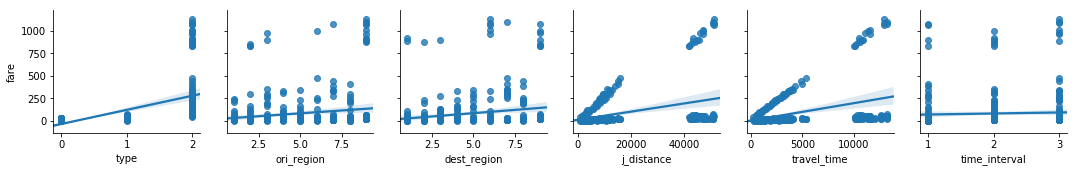

In [46]:
sns.pairplot(more_data,x_vars=['type','ori_region','dest_region','j_distance',
                             'travel_time','time_interval'],y_vars='fare',kind='reg')

*From the graph 1, it is evident that the fare varies by Uber Type.

*Hence it would be ideal to split the data by Uber type and then do the fare prediction.

*The origin region and destination have a very similar effect on the fare, so it would be better to use only one of the two, preferably origin region for modelling.

*The distance variable has a very linear relationship with fare as expected. We can also notice that some fares are very positively related with distance. This again could be just for one of the Uber type, Uber Black, maybe.

*The same is applicable for travel time. 

*Ideally only one of the variable, out of distance and time needs to be selected.

*The effect of time interval on the fare is hard to see but effect would be definetly more prominent per Uber type.



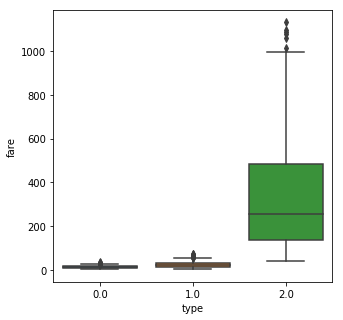

In [47]:
plt.rcParams['figure.figsize']= 5,5
sns.boxplot(data=more_data[['type','fare']],x='type',y='fare')

Above plot confirms that, there could be outliers in the fare of each uber type.
These outliers should be removed for fare prediction.Function below helps to identify the outliers.
This is done by verfying the points beyond 1.5*IQR* and filtering them.

In [51]:
#outliers are removed separately for each uber type 
def remove_outlier(data_df):
    ubertype=(0,1,2)
    clean_df = pd.DataFrame()
    outlier_df = pd.DataFrame()
    for each in ubertype:
        #each type of uber 
        ubertype_df=data_df[data_df.iloc[:,-1]==[each]]
        Q1 = ubertype_df.quantile(0.25)
        Q3 = ubertype_df.quantile(0.75)
        IQR = Q3 - Q1
        LB = Q1 - 1.5 * IQR
        UB = Q3 + 1.5 * IQR
        clean=ubertype_df[~((ubertype_df < LB)|(ubertype_df > UB)).any(axis=1)]
        outlier= ubertype_df[((ubertype_df < LB)|(ubertype_df > UB)).any(axis=1)]
        clean_df=pd.concat([clean_df,clean])
        outlier_df=pd.concat([outlier_df,outlier])
                               
    return(clean_df,outlier_df)

df_fare=more_data[['fare','type']]
cleaned_data,outlier_data= remove_outlier(df_fare)


In [57]:
outlier_data.shape

(29, 2)

In [58]:
cleaned_data.shape

(393, 2)

Post outlier cleaning 29 entries have been removed from all the three Uber types combined.

Now remaining 393 datapoints will be used for modelling

In [61]:
#mapping this data with original
#######################################################
uber_clean_df = more_data.index.isin(cleaned_data.index)
uber_clean_df= more_data[uber_clean_df]
uber_clean_df.shape


(393, 15)

In [62]:
#Making data copies 
more_data1 = more_data.copy()
more_data= uber_clean_df.copy()
more_data.shape

(393, 15)

Now flagging the weekend and weekdays based on departure date as this could be influential in fare hike

In [71]:
#assign week day number , 0- Monday , 5-Saturday etc
more_data['weekday'] = pd.to_datetime(more_data['dept_date']).apply(lambda x: x.weekday())

more_data['weekday_flag'] = 2

for i in range(len(more_data)):
   
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    if  more_data['weekday'].iloc[i] < 5:
        more_data.weekday_flag.iloc[i]=0
    else:
        more_data.weekday_flag.iloc[i]=1
        

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
more_data = more_data.drop(columns=[ 'weekday'])

In [73]:
more_data.shape

(393, 16)

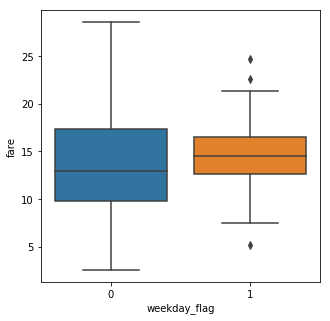

In [74]:
#checking the effect of weekday and weekend on fare 
#0- weekday
#1- weekend
#below is for Uber type 0 - Uber pool
plt.rcParams['figure.figsize']= 5,5
x=more_data[more_data['type']==0]
sns.boxplot(data=x[['weekday_flag','fare']],x='weekday_flag',y='fare')

Uber Type = 0


Uber Pool


This shows that number of trips are lesser as expected but fare for those trips are higher in few cases during the weekend.
The fare spread is larger during the weekdays, though median fare is higher during weekends.

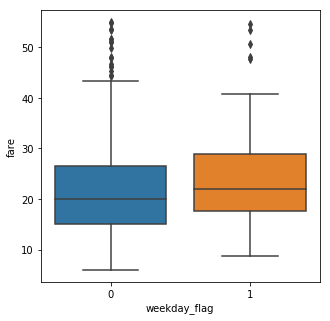

In [75]:
#checking the effect of weekday and weekend on fare 
#0- weekday
#1- weekend
#below is for Uber type 1- Uber X

plt.rcParams['figure.figsize']= 5,5
x=more_data[more_data['type']==1]
sns.boxplot(data=x[['weekday_flag','fare']],x='weekday_flag',y='fare')

Uber Type = 1


Uber X


This shows that number of trips are almost similar during weekday and weekend.
The median fare is higher for weekends as expected.

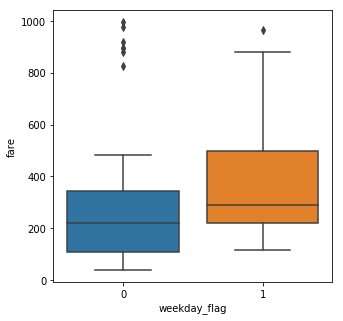

In [76]:
#checking the effect of weekday and weekend on fare 
#0- weekday
#1- weekend
#below is for Uber type 2- Uber Black


plt.rcParams['figure.figsize']= 5,5
x=more_data[more_data['type']==2]
sns.boxplot(data=x[['weekday_flag','fare']],x='weekday_flag',y='fare')

Uber Type = 2


Uber Black


This shows that number of trips are slightly more during weekend compared to weekdays, and fare is definetly higher for weekend than for weekdays

### 5.3 Modelling the prepared Uber data to impute fare for each type of Uber


In [77]:
more_data.columns

Index(['trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat', 'ori_lng',
       'dest_lat', 'dest_long', 'j_distance', 'dept_date', 'dept_time',
       'travel_time', 'arrival_time', 'fare', 'time_interval', 'weekday_flag'],
      dtype='object')

In [78]:
#Taking alll the numeric feature 
#removing travel time as it is highly correlated with distance
linear=more_data[['type','ori_region','j_distance', 'time_interval', 'weekday_flag','fare']]
linear.head()

,type,ori_region,j_distance,time_interval,weekday_flag,fare
0,0.0,6,5825.0,2,0,11.15
1,0.0,1,9970.0,2,0,11.76
2,2.0,3,11169.0,2,0,357.92
3,1.0,4,4603.0,1,0,10.37
4,1.0,4,12680.0,1,0,23.18


In [79]:
# separating the data with na and witout na
#without na data will be used for training
train_linear=linear[linear['fare'].notnull()]
fit_linear=linear[linear['fare'].isnull()]

In [80]:
#Finding co-relation
corr = train_linear.corr()
corr.style.background_gradient()

,type,ori_region,j_distance,time_interval,weekday_flag,fare
type,1,-0.0739089,0.0303002,0.00496157,-0.0663001,0.569235
ori_region,-0.0739089,1,0.394186,-0.020769,-0.0898769,0.0845234
j_distance,0.0303002,0.394186,1,0.0166456,-0.0716551,0.343229
time_interval,0.00496157,-0.020769,0.0166456,1,0.00739761,0.0388891
weekday_flag,-0.0663001,-0.0898769,-0.0716551,0.00739761,1,0.0432153
fare,0.569235,0.0845234,0.343229,0.0388891,0.0432153,1


The corelation factor between type and fare is 0.56. Hence it further stresses that type should be separated to see the effects clearly. Travel time and origin region may have multicolinarity, which can be checked further.


Based on this analysis modelling can be done for each uber type separately

In [89]:
upool=train_linear[train_linear['type']==0]
ux=train_linear[train_linear['type']==1]
ublack=train_linear[train_linear['type']==2]


upool_na=fit_linear[fit_linear['type']==0]
ux_na=fit_linear[fit_linear['type']==1]
ublack_na=fit_linear[fit_linear['type']==2]


In [90]:
len(upool_na)

8

In [91]:
len(ux_na)

7

In [92]:
len(ublack_na)

3

In [93]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\Stephy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 5.3.1 Modelling for Uber Pool

In [94]:
#uber pool
#syntax to split traing and testing data automatically 
X_train, X_test, Y_train, Y_test = train_test_split(upool.iloc[:,:-1],upool.iloc[:,-1:])

lm = LinearRegression() # Linear Regression
lm.fit(X_train,Y_train)

y_hat=lm.predict(X_test)

#Model goodness checking
print ('R-squared value = ',lm.score(X_test,Y_test))


R-squared value =  0.9430108223248524


R-squared value =  0.94 indicates a good model

Text(0.5,1,'Linear Fit Graph for Uber Pool')

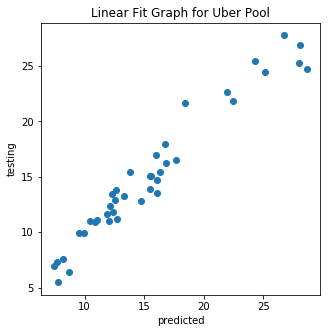

In [95]:

plt.scatter(y_hat,Y_test)
plt.xlabel('predicted')
plt.ylabel('testing')
plt.title('Linear Fit Graph for Uber Pool')

In [96]:

upool_na['fare'][upool_na['fare'].isnull()] = lm.predict(upool_na.drop(['fare'],axis=1)) 
upool_na['fare']=round(upool_na['fare'],2)


C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Stephy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Stephy\Anaconda3\lib\site-packages\i

In [97]:
upool_na

,type,ori_region,j_distance,time_interval,weekday_flag,fare
81,0.0,7,10415.0,2,0,12.81
82,0.0,6,7017.0,1,1,10.16
89,0.0,4,4782.0,1,0,6.56
93,0.0,6,11711.0,1,0,9.27
96,0.0,1,2527.0,2,1,11.62
98,0.0,8,2835.0,1,0,6.53
100,0.0,7,9411.0,3,0,16.28
109,0.0,1,6140.0,3,0,14.18


In [98]:
uber_pool = more_data.index.isin(upool_na.index)
uber_pool = more_data[uber_pool]
uber_pool.fare = upool_na.fare

#predicted values for Uber Pool
uber_pool

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,time_interval,weekday_flag
81,ID1129746878,0.0,7,3,-37.861835,144.905716,-37.809342,144.992395,10415.0,2018-02-19,17:09:02,3456.72,18:06:38,12.81,2,0
82,ID1970075138,0.0,6,5,-37.790797,144.985865,-37.805044,144.925926,7017.0,2018-07-22,10:49:07,2026.20,11:22:53,10.16,1,1
89,ID1301935862,0.0,4,1,-37.800225,145.009610,-37.802653,144.963491,4782.0,2018-06-18,10:59:00,1316.94,11:20:56,6.56,1,0
93,ID1611767973,0.0,6,7,-37.790797,144.985865,-37.861835,144.905716,11711.0,2018-03-21,07:11:12,3866.94,8:15:38,9.27,1,0
96,ID1626141128,0.0,1,4,-37.804996,144.971608,-37.807412,144.998521,2527.0,2018-03-18,20:25:47,626.16,20:36:13,11.62,2,1
98,ID1728618028,0.0,8,4,-37.807202,145.026637,-37.814129,145.004671,2835.0,2018-05-16,11:30:48,660.66,11:41:48,6.53,1,0
100,ID1503345228,0.0,7,1,-37.861835,144.905716,-37.805283,144.955317,9411.0,2018-07-18,21:03:37,3144.90,21:56:01,16.28,3,0
109,ID1162920801,0.0,1,4,-37.815354,144.935589,-37.805506,144.997886,6140.0,2018-01-03,02:07:21,1576.44,2:33:37,14.18,3,0


### 5.3.2 Modelling for Uber X

In [114]:
#uber x
#test train split for Uber X
#Ref https://stackoverflow.com/questions/31521170/scikit-learn-train-test-split-with-indices
X_train, X_test, Y_train, Y_test = train_test_split(ux.iloc[:,:-1],ux.iloc[:,-1:])

lm = LinearRegression() # Linear Regression
lm.fit(X_train,Y_train)

y_hat=lm.predict(X_test)

#Model goodness checking
print ('R-squared value = ',lm.score(X_test,Y_test))

R-squared value =  0.9570496670910065


R-squared value =  0.95 indicates a good model

Text(0.5,1,'Linear Fit Graph for Uber X')

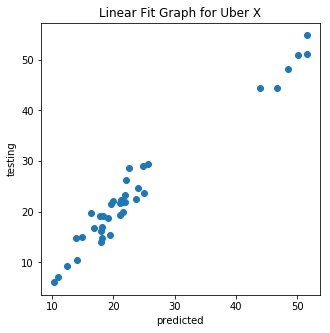

In [115]:
plt.scatter(y_hat,Y_test)
plt.xlabel('predicted')
plt.ylabel('testing')
plt.title('Linear Fit Graph for Uber X')

In [116]:
ux_na['fare'][ux_na['fare'].isnull()] = lm.predict(ux_na.drop(['fare'],axis=1)) 
ux_na['fare']=round(ux_na['fare'],2)

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Stephy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

In [117]:
ux_na

,type,ori_region,j_distance,time_interval,weekday_flag,fare
80,1.0,2,6007.0,2,0,16.67
83,1.0,8,6409.0,3,1,25.25
91,1.0,9,50797.0,1,0,48.32
101,1.0,7,12775.0,3,0,27.88
104,1.0,2,10291.0,2,0,19.91
113,1.0,3,5830.0,3,0,21.34
117,1.0,8,13562.0,2,0,24.31


In [118]:
uber_x = more_data.index.isin(ux_na.index)
uber_x = more_data[uber_x]
uber_x.fare = ux_na.fare

#predicted data for Uber X
uber_x

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,time_interval,weekday_flag
80,ID3446739218,1.0,2,3,-37.819344,144.932088,-37.827091,144.974919,6007.0,2018-05-01,13:38:57,1442.94,14:02:59,16.67,2,0
83,ID3345890245,1.0,8,3,-37.815834,145.046450,-37.820207,144.984383,6409.0,2018-03-17,23:45:02,1945.44,0:17:27,25.25,3,1
91,ID3802084473,1.0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-07-10,08:01:56,13204.98,11:42:00,48.32,1,0
101,ID3434183545,1.0,7,5,-37.861835,144.905716,-37.800647,144.935772,12775.0,2018-01-23,23:18:26,4025.22,0:25:31,27.88,3,0
104,ID3349169607,1.0,2,7,-37.814511,144.938358,-37.861835,144.905716,10291.0,2018-05-09,16:53:28,3370.62,17:49:38,19.91,2,0
113,ID3929143578,1.0,3,5,-37.818579,144.992130,-37.809117,144.936871,5830.0,2018-06-07,01:55:23,1359.90,2:18:02,21.34,3,0
117,ID3824103313,1.0,8,6,-37.815834,145.046450,-37.773803,144.983647,13562.0,2018-01-11,12:05:31,4192.26,13:15:23,24.31,2,0


### 5.3.3 Modelling for Uber Black

In [133]:
#uber black
X_train, X_test, Y_train, Y_test = train_test_split(ublack.iloc[:,:-1],ublack.iloc[:,-1:])

lm = LinearRegression() # Linear Regression
lm.fit(X_train,Y_train)

y_hat=lm.predict(X_test)

#Model goodness checking
print ('R-squared value = ',lm.score(X_test,Y_test))

R-squared value =  0.9668849131075251


R-squared value =  0.96 indicates a good model

Text(0.5,1,'Linear Fit Graph for Uber Black')

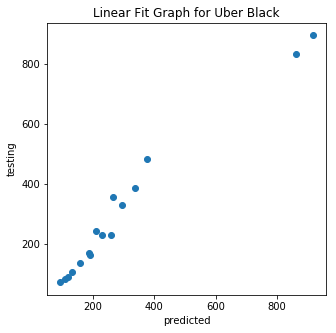

In [134]:
plt.scatter(y_hat,Y_test)
plt.xlabel('predicted')
plt.ylabel('testing')
plt.title('Linear Fit Graph for Uber Black')

In [135]:
ublack_na['fare'][ublack_na['fare'].isnull()] = lm.predict(ublack_na.drop(['fare'],axis=1)) 
ublack_na['fare']=round(ublack_na['fare'],2)


C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Stephy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

In [136]:
ublack_na

,type,ori_region,j_distance,time_interval,weekday_flag,fare
87,2.0,9,43688.0,1,0,902.44
105,2.0,4,3182.0,2,0,115.37
115,2.0,9,44035.0,3,1,934.74


In [137]:
uber_black = more_data.index.isin(ublack_na.index)
uber_black = more_data[uber_black]
uber_black.fare = ublack_na.fare

uber_black

C:\Users\Stephy\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,time_interval,weekday_flag
87,ID5771249188,2.0,9,5,-38.110916,144.654173,-37.805324,144.933267,43688.0,2018-04-16,08:15:31,10478.88,11:10:09,902.44,1,0
105,ID5732321483,2.0,4,8,-37.813248,145.000132,-37.807202,145.026637,3182.0,2018-03-21,17:18:33,777.78,17:31:30,115.37,2,0
115,ID5383986219,2.0,9,3,-38.110916,144.654173,-37.823719,144.967352,44035.0,2018-01-07,22:01:42,10724.46,1:00:26,934.74,3,1


In [182]:
all_m = pd.concat([uber_pool,uber_x,uber_black])

In [183]:
all_m

,trip_id,type,ori_region,dest_region,ori_lat,ori_lng,dest_lat,dest_long,j_distance,dept_date,dept_time,travel_time,arrival_time,fare,time_interval,weekday_flag
81,ID1129746878,0.0,7,3,-37.861835,144.905716,-37.809342,144.992395,10415.0,2018-02-19,17:09:02,3456.72,18:06:38,12.81,2,0
82,ID1970075138,0.0,6,5,-37.790797,144.985865,-37.805044,144.925926,7017.0,2018-07-22,10:49:07,2026.20,11:22:53,10.16,1,1
89,ID1301935862,0.0,4,1,-37.800225,145.009610,-37.802653,144.963491,4782.0,2018-06-18,10:59:00,1316.94,11:20:56,6.56,1,0
93,ID1611767973,0.0,6,7,-37.790797,144.985865,-37.861835,144.905716,11711.0,2018-03-21,07:11:12,3866.94,8:15:38,9.27,1,0
96,ID1626141128,0.0,1,4,-37.804996,144.971608,-37.807412,144.998521,2527.0,2018-03-18,20:25:47,626.16,20:36:13,11.62,2,1
98,ID1728618028,0.0,8,4,-37.807202,145.026637,-37.814129,145.004671,2835.0,2018-05-16,11:30:48,660.66,11:41:48,6.53,1,0
100,ID1503345228,0.0,7,1,-37.861835,144.905716,-37.805283,144.955317,9411.0,2018-07-18,21:03:37,3144.90,21:56:01,16.28,3,0
109,ID1162920801,0.0,1,4,-37.815354,144.935589,-37.805506,144.997886,6140.0,2018-01-03,02:07:21,1576.44,2:33:37,14.18,3,0
80,ID3446739218,1.0,2,3,-37.819344,144.932088,-37.827091,144.974919,6007.0,2018-05-01,13:38:57,1442.94,14:02:59,16.67,2,0
83,ID3345890245,1.0,8,3,-37.815834,145.046450,-37.820207,144.984383,6409.0,2018-03-17,23:45:02,1945.44,0:17:27,25.25,3,1


In [184]:
len(all_m)

18

In [185]:
non_missing=missing[missing['fare'].notnull()]
final = pd.concat([non_missing,all_m])

C:\Users\Stephy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [186]:
len(missing)

124

In [187]:
len(all_m)

18

In [188]:
len(final)

124

In [189]:
final.columns

Index(['arrival_time', 'dept_date', 'dept_time', 'dest_lat', 'dest_long',
       'dest_region', 'fare', 'j_distance', 'ori_lat', 'ori_lng', 'ori_region',
       'time_interval', 'travel_time', 'trip_id', 'type', 'weekday_flag'],
      dtype='object')

In [191]:
final = final.drop(columns=['time_interval','weekday_flag'])

KeyError: "labels ['time_interval' 'weekday_flag'] not contained in axis"

In [192]:
final = final[['trip_id', 'type', 'ori_region', 'dest_region',
         'ori_lat','ori_lng','dest_lat',
         'dest_long','j_distance','dept_date',
        'dept_time','travel_time','arrival_time','fare']]

In [198]:
to_merge = pd.DataFrame(missing.trip_id)
len(to_merge)
to_merge

,trip_id
0,ID1150447209
1,ID1865938578
2,ID5959375442
3,ID3415243284
4,ID3952316105
5,ID1137438502
6,ID3327093815
7,ID5333097186
8,ID3984616234
9,ID1932239555


### 5.4 Saving the fixed file

In [200]:
final_data = pd.merge(to_merge, final,  how='left', left_on=['trip_id'], right_on = ['trip_id'])

In [201]:
final_data.columns=['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
                   'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
                   'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
                   'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']

In [203]:
# saving as csv file

final_data.to_csv('29915651.missing_value_solution.csv', encoding='utf-8', index=False)

In [204]:
final_data.isnull().sum()

Unnamed: 0               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64

#### The final output after missing value computation has no null values

## 6.  Outlier detection and removal

### Task 3 

Impute the outlier values in <student_no>_outlier_value.csv

The data given is the 29915651_outliers file.
Basic EDA is performed on this file to understand the data and how the missing values can be imputed.

In [212]:
outlier= pd.read_csv("29915651_outliers.csv")

### 6.1 Methodology based on IQR 

Outlier detection can be done based on boxplot IQR method.
In this method all point beyond Q1-1.5IQR and all points beyond Q3+1.5IQR is considered as outlier.


This method is equivalent to removing ooutliers from mean+2.96 SD for upper bound and mean-2.96 SD if the data is fitted as a normal distribution

Ref: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

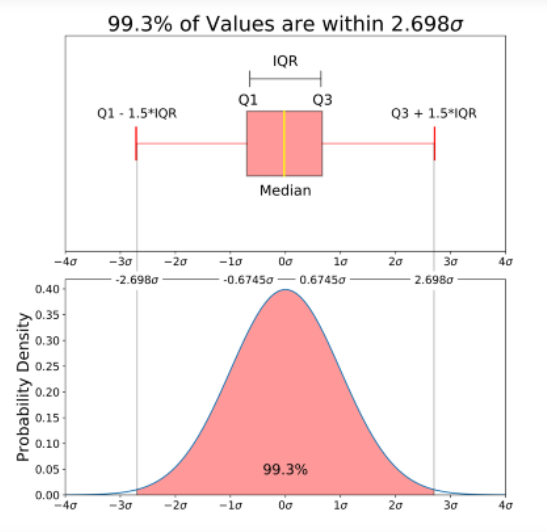

In [213]:
outlier.shape

(108, 15)

In [235]:
outlier.columns

Index(['index', 'trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat',
       'ori_lng', 'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare'],
      dtype='object')

In [215]:
#rename columns
outlier.columns = ['index','trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat', 'ori_lng',
       'dest_lat', 'dest_long', 'j_distance', 'dept_date', 'dept_time',
       'travel_time', 'arrival_time', 'fare']

In [216]:
outlier.columns

Index(['index', 'trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat',
       'ori_lng', 'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare'],
      dtype='object')

Basic EDA is performed on the data to find the spread of fare

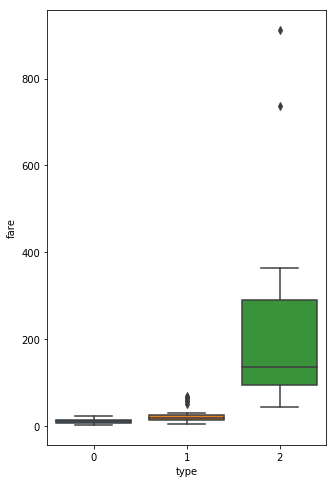

In [217]:
#Plotting the outliers
plt.rcParams['figure.figsize']=5,8
sns.boxplot(data=outlier[['type','fare']],x='type',y='fare')

It can de seen that in each Uber type there is outlier for the fare, especially in the case of Uber Black


In [218]:
#checking the number of entries in each type
outlier.groupby('type')['trip_id'].nunique()

type
0    51
1    44
2    13
Name: trip_id, dtype: int64

### 6.2 Outlier removal

In [219]:
#outliers are removed separately for each uber type 
def remove_outlier(data_df):
    ubertype=(0,1,2)
    #empty dataframe for cleaned data
    clean_df = pd.DataFrame()
    #empty dataframe for outlier data
    outlier_df = pd.DataFrame()
    for each in ubertype:
        #each type of uber 
        ubertype_df=data_df[data_df.iloc[:,-1]==[each]]
        Q1 = ubertype_df.quantile(0.25)
        Q3 = ubertype_df.quantile(0.75)
        IQR = Q3 - Q1
        LB = Q1 - 1.5 * IQR
        UB = Q3 + 1.5 * IQR
        clean=ubertype_df[~((ubertype_df < LB)|(ubertype_df > UB)).any(axis=1)]
        outlier= ubertype_df[((ubertype_df < LB)|(ubertype_df > UB)).any(axis=1)]
        clean_df=pd.concat([clean_df,clean])
        outlier_df=pd.concat([outlier_df,outlier])
                               
    return(clean_df,outlier_df)

df_fare=outlier[['fare','type']]
cleaned_data,outlier_data= remove_outlier(df_fare)


In [220]:
outlier_data

,fare,type
6,69.04,1
22,56.60,1
30,63.74,1
45,56.87,1
55,51.35,1
68,63.45,1
2,736.66,2
63,912.84,2


In [221]:
cleaned_data.shape

(100, 2)

Thus 8 outlier points are removed from this method

In [222]:
clean_out = outlier.index.isin(cleaned_data.index)
clean_out=outlier[clean_out]

In [223]:
clean_out.columns

Index(['index', 'trip_id', 'type', 'ori_region', 'dest_region', 'ori_lat',
       'ori_lng', 'dest_lat', 'dest_long', 'j_distance', 'dept_date',
       'dept_time', 'travel_time', 'arrival_time', 'fare'],
      dtype='object')

### 6.3 Saving the fixed file

In [224]:
clean_out.columns=['Unnamed: 0', 'Unnamed: 0.1', 'Uber Type', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance(m)',
       'Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time',
       'Fare$']


In [225]:
# saving as csv file
clean_out.to_csv('29915651_outliers_solution.csv', encoding='utf-8', index=False)


#### The 8 outlier points identifies were removed from the final output 

In [ ]:
#Thank you

## 7. Summary

1. The dirty data had errors in the uber type, destination and origion region, destination and origin latitude, distance, arrival and given time.
All these errors were fixed using the various method described in this project.
The count of errors fixed are as below. In the arrival time the deviation is one second for a lot of values


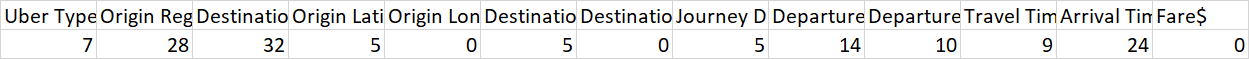

2. The missing value treatment had to be done for Uber Type and for fare.
The fare was calculated based on linear modelling for each type of Uber separately.
20 Uber types and 18 fare values were imputed

3. By classifying the points beyong Q3 +IQR and Q1- IQR, 8 data points were labelled as outliers and removed from the data.

## 8. References



Networkx
https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
https://www.python-course.eu/networkx.php


Haversine Distance
https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude 


Cross Product
https://stackoverflow.com/questions/53699012/performant-cartesian-product-cross-join-with-pandas/53699013#53699013


Filter and group by
https://stackoverflow.com/questions/27488080/python-pandas-filter-rows-after-groupby


Validating time format
https://stackoverflow.com/questions/27488080/python-pandas-filter-rows-after-groupby


Timedelta conversion and operation
https://stackoverflow.com/questions/34519536/convert-integer-series-to-timedelta-in-pandas


Time operation
https://www.numpy.org/devdocs/reference/arrays.datetime.html


Test train split
https://stackoverflow.com/questions/31521170/scikit-learn-train-test-split-with-indices


Outliers 
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51




### Thank you